# Nelder-Mead algorithm

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Nelder-Mead_Himmelblau.gif/435px-Nelder-Mead_Himmelblau.gif)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

---
The algorithm is implemented in the [nelder_mead.py](../optimizers/nelder_mead.py) file based on the description in [Wikipedia](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)

---

In [3]:
from nelder_mead import NelderMead

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
Let's optimize the function
$$
f(x) = \sin(y)e^{(1 - \cos(x))^2} + \cos(x)e^{(1 - \sin(y))^2} + (x - y)^2
$$

---

In [4]:
def f(x):
    return np.sin(x[1]) * np.exp(np.power(1 - np.cos(x[0]), 2)) + \
           np.cos(x[0]) * np.exp(np.power(1 - np.sin(x[1]), 2)) + \
           np.power(x[0] - x[1], 2)

In [5]:
def plot_convergence(ax, f, start_x, label, alpha=1., gamma=2., rho=0.5, sigma=0.5):
    x, best, hist = NelderMead(f, start_x, alpha=alpha, gamma=gamma, rho=rho, sigma=sigma).optimize()
    print('{} -> {} with score {}'.format(start_x, x, best))

    n_iter = len(hist['x'])
    xs = np.zeros(n_iter)
    ys = np.zeros(n_iter)
    for i, x in enumerate(hist['x']):
        xs[i] = x[0]
        ys[i] = x[1]

    ax.plot(xs, ys, linewidth=3, label=label)
    ax.scatter(xs, ys, linewidth=3)

no improvement after 40 iterations
[0. 0.] -> [0.90529655 0.66535974] with score 1.4870192206092143
no improvement after 62 iterations
[5. 5.] -> [3.15296102 4.70105562] with score -106.76453665873014
no improvement after 73 iterations
[11.  0.] -> [ 9.43612879 10.98423187] with score -106.76453674427398
no improvement after 34 iterations
[ 2. 11.] -> [ 3.19892426 10.9381897 ] with score -48.406017918684334
no improvement after 41 iterations
[ 7. 11.] -> [ 9.43612249 10.9841584 ] with score -106.76453607529035


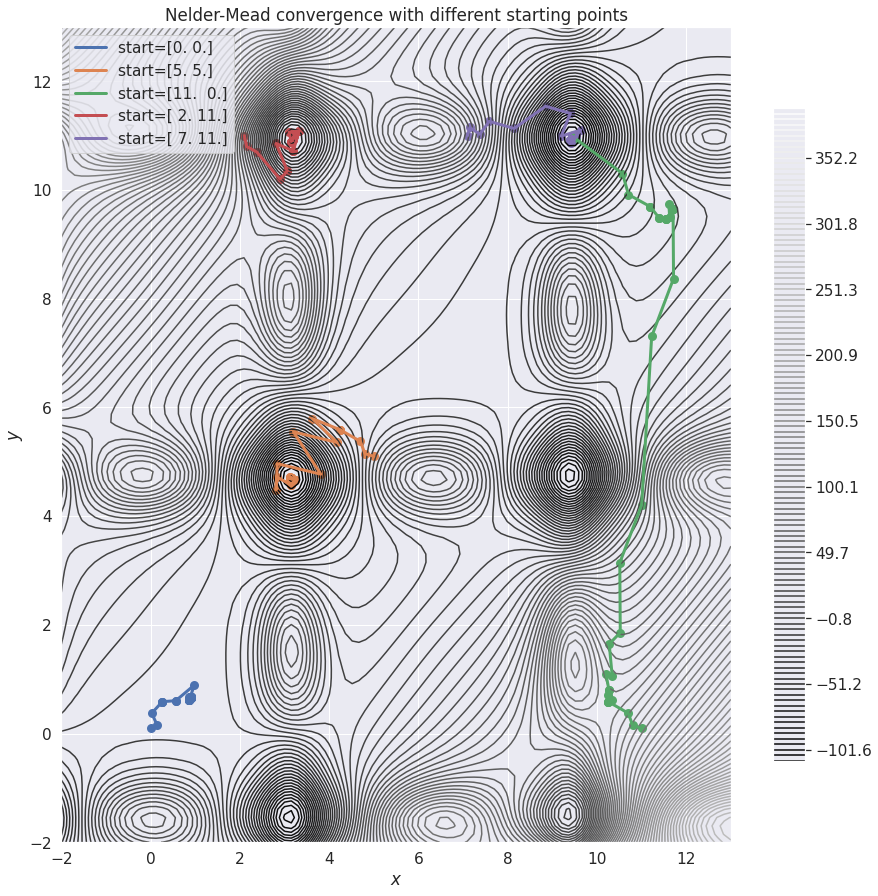

In [7]:
starts = [
    np.array([0.0, 0.0]),
    np.array([5.0, 5.0]),
    np.array([11.0, 0.0]),
    np.array([2.0, 11.0]),
    np.array([7.0, 11.0]),
]

plt.figure(figsize=(15, 15))

for start in starts:
    plot_convergence(plt, f, start, 'start={}'.format(start))

plt.title('Nelder-Mead convergence with different starting points')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

A, B = np.meshgrid(np.linspace(-2, 13, 100), np.linspace(-2, 13, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        x = np.array([A[i, j], B[i, j]])
        levels[i, j] = f(x)

CS = plt.contour(A, B, levels, levels=np.linspace(0, 500, num=120)-110, cmap='gray')
CB = plt.colorbar(CS, shrink=0.8)

plt.legend()
plt.show()

no improvement after 42 iterations
[0. 7.] -> [3.15261967 4.70099277] with score -106.7645224671719
no improvement after 103 iterations
[0. 7.] -> [0.56195305 5.92130204] with score 33.65336777739531
no improvement after 28 iterations
[0. 7.] -> [2.77134695 4.00616188] with score -51.0015407064106


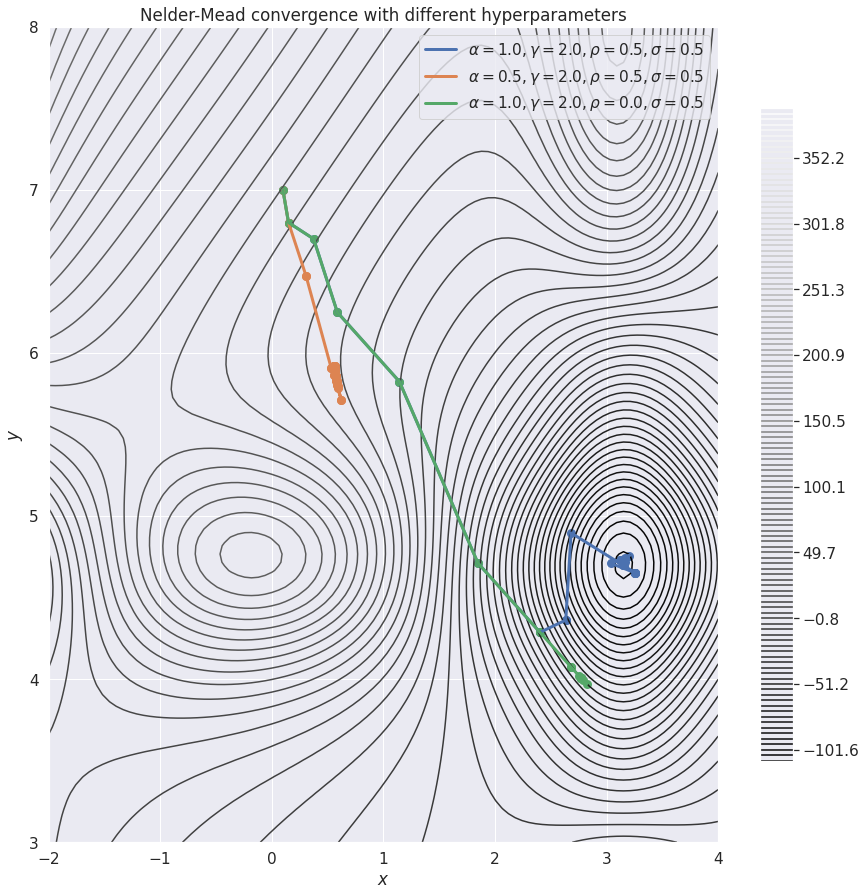

In [8]:
start_x = np.array([0., 7.])

hyperparams = [
    [1.0, 2.0, 0.5, 0.5],
    [0.5, 2.0, 0.5, 0.5],
    [1.0, 2.0, 0.0, 0.5],
]

plt.figure(figsize=(15, 15))

for h in hyperparams:
    label = r'$\alpha={}, \gamma={}, \rho={}, \sigma={}$'.format(h[0], h[1], h[2], h[3])
    plot_convergence(plt, f, start_x, label, h[0], h[1], h[2], h[3])

plt.title('Nelder-Mead convergence with different hyperparameters')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

A, B = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(3, 8, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        x = np.array([A[i, j], B[i, j]])
        levels[i, j] = f(x)

CS = plt.contour(A, B, levels, levels=np.linspace(0, 500, num=120)-110, cmap='gray')
CB = plt.colorbar(CS, shrink=0.8)

plt.legend()
plt.show()